In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pre_processing as pp

### Step 0: Load Preprocessed Binary Encoded Dataset

In [2]:
# Replace with the actual path to your CSV
df = pd.read_csv(r"data/processed_data.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)


print("Dataset shape:", df.shape)

item_groups = {
    "Gender" : ['Gender_Male', 'Gender_Female'],
    "Age" : ['Age_Teen', 'Age_Young_Adult', 'Age_Adult', 'Age_Mid_Adult'],
    "Location" : ['Location_India', 'Location_US', 'Location_Other'],
    "Frequency" : ['Gaming_Daily', 'Gaming_Weekly', 'Gaming_Monthly', 'Gaming_Rarely_Never'],
    "Hours" : ['Gaming_Hours_0-1_hour', 'Gaming_Hours_1-5_hours', 'Gaming_Hours_5-10_hours', 'Gaming_Hours_10-20_hours', 'Gaming_Hours_20plus_hours'],
    "Device" : ['Device_PC', 'Device_Mobile', 'Device_Console', 'Device_Handheld', 'Device_Tablet'],
    "Genre" : ['Genre_Action/Adventure', 'Genre_FPS', 'Genre_RPG', 'Genre_Puzzle/Strategy', 'Genre_Simulation', 'Genre_MMO', 'Genre_Sports'],
    "Favorite" : ['Favorite_Game_bgmi', 'Favorite_Game_call_of_duty', 'Favorite_Game_chess', 'Favorite_Game_clash_of_clans', 'Favorite_Game_efootball', 'Favorite_Game_fc_mobile', 'Favorite_Game_fortnite', 'Favorite_Game_free_fire', 'Favorite_Game_god_of_war_ragnarok', 'Favorite_Game_moba_legends', 'Favorite_Game_red_dead_redemption_2', 'Favorite_Game_rhythm_rush_lite', 'Favorite_Game_solo_leveling', 'Favorite_Game_subway', 'Favorite_Game_wukong', 'Favorite_Game_wuthering_waves', 'Favorite_Game_unknown'],
    "Discovery" : ['Discovery_Social_Media', 'Discovery_Gaming_Forums', 'Discovery_Friends_Family', 'Discovery_Game_Reviews', 'Discovery_YouTube_Streaming', 'Discovery_Self_Search', 'Game_Mode_Single_Player'],
    "Game Mode" : ['Game_Mode_Single_Player', 'Game_Mode_Multiplayer', 'Game_Mode_Both'],
    "Spending" : ['Spend_lt100', 'Spend_100-500', 'Spend_500-1000', 'Spend_1000plus'],
    "Reason" : ['Reason_Fun', 'Reason_Stress_Relief', 'Reason_Skills_Competition', 'Reason_Socialize', 'Reason_Learning', 'Reason_Other']
}

print("Sample transactions:")
df.head()

Dataset shape: (500, 66)
Sample transactions:


,Age_Teen,Age_Young_Adult,Age_Adult,Age_Mid_Adult,Location_India,Location_US,Location_Other,Gender_Female,Gender_Male,Gaming_Daily,...,Spend_lt100,Spend_100-500,Spend_500-1000,Spend_1000plus,Reason_Fun,Reason_Stress_Relief,Reason_Skills_Competition,Reason_Socialize,Reason_Learning,Reason_Other
0,1,0,0,0,1,0,0,0,1,1,...,1,0,0,0,1,1,0,0,0,0
1,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,1,...,1,0,0,0,1,1,1,1,0,0


In [3]:
def category_distribution(rules_df, item_groups):
    rows = []

    for category, items in item_groups.items():
        antecedent_count = rules_df["antecedents"].apply(
            lambda s: len(s.intersection(items))
        ).sum()

        consequent_count = rules_df["consequents"].apply(
            lambda s: len(s.intersection(items))
        ).sum()

        rules_with_antecedent = rules_df["antecedents"].apply(
            lambda s: not s.isdisjoint(items)
        ).sum()

        rules_with_consequent = rules_df["consequents"].apply(
            lambda s: not s.isdisjoint(items)
        ).sum()

        rows.append({
            "Category": category,
            "Antecedent Item Count": antecedent_count,
            "Consequent Item Count": consequent_count,
            "Rules w/ Antecedent (%)": rules_with_antecedent / len(rules_df) * 100,
            "Rules w/ Consequent (%)": rules_with_consequent / len(rules_df) * 100
        })

    return pd.DataFrame(rows).set_index("Category")

In [4]:
def print_apriori_rules(rules_df):
    """
    Prints Apriori rules in the format:
    antecedent1, antecedent2 -> consequent1, consequent2
    """

    if rules_df.empty:
        print("No rules to display.")
        return

    for _, row in rules_df.iterrows():
        antecedent = ", ".join(sorted(row["antecedents"]))
        consequent = ", ".join(sorted(row["consequents"]))
        print(f"{antecedent} -> {consequent}")

### Step 1: Generate Frequent Itemsets

In [5]:
MIN_SUPPORT = 0.05  # adjust based on dataset size (500+ entries recommended)

frequent_itemsets = apriori(
    df,
    min_support=MIN_SUPPORT,
    use_colnames=True
)

frequent_itemsets.sort_values(by="support", ascending=False, inplace=True)

print("\nFrequent Itemsets:")
print(frequent_itemsets)

c:\Users\Admin\anaconda3\envs\assoc_mining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Frequent Itemsets:
      support                                           itemsets
47      0.668                                       (Reason_Fun)
20      0.596                           (Genre_Action/Adventure)
17      0.588                                    (Device_Mobile)
7       0.536                                    (Gender_Female)
4       0.530                                   (Location_India)
...       ...                                                ...
9806    0.050  (Reason_Fun, Genre_FPS, Discovery_Social_Media...
9798    0.050  (Reason_Fun, Genre_FPS, Discovery_Gaming_Forum...
9796    0.050  (Reason_Fun, Reason_Skills_Competition, Genre_...
9792    0.050  (Reason_Fun, Reason_Skills_Competition, Reason...
9791    0.050  (Reason_Fun, Spend_lt100, Device_Mobile, Disco...

[10975 rows x 2 columns]


### Step 2: Generate Association Rules

In [6]:
MIN_SUPPORT = 0.25

rules = association_rules(
    frequent_itemsets,
    metric="support",
    min_threshold=MIN_SUPPORT
)

print("\nAssociation Rules shape: ", rules.shape)


Association Rules shape:  (116, 14)


#### Filtering Rules

In [7]:
rules.sort_values("confidence", ascending=False, inplace=True)

print("\nAssociation Rules Shape: ", rules.shape)

rules


Association Rules Shape:  (116, 14)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
54,(Discovery_Friends_Family),(Genre_Action/Adventure),0.334,0.596,0.290,0.868263,1.456818,1.0,0.090936,3.066727,0.470829,0.453125,0.673919,0.677420
88,(Genre_MMO),(Genre_Action/Adventure),0.306,0.596,0.262,0.856209,1.436593,1.0,0.079624,2.809636,0.437908,0.409375,0.644082,0.647903
97,(Genre_RPG),(Genre_Action/Adventure),0.306,0.596,0.260,0.849673,1.425626,1.0,0.077624,2.687478,0.430193,0.404984,0.627904,0.642957
84,(Discovery_Friends_Family),(Reason_Fun),0.334,0.668,0.264,0.790419,1.183262,1.0,0.040888,1.584114,0.232551,0.357724,0.368732,0.592814
60,(Spend_lt100),(Device_Mobile),0.362,0.588,0.286,0.790055,1.343631,1.0,0.073144,1.962421,0.400859,0.430723,0.490425,0.638225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,(Reason_Fun),(Device_PC),0.668,0.388,0.272,0.407186,1.049447,1.0,0.012816,1.032364,0.141921,0.346939,0.031349,0.554108
85,(Reason_Fun),(Discovery_Friends_Family),0.668,0.334,0.264,0.395210,1.183262,1.0,0.040888,1.101208,0.466502,0.357724,0.091906,0.592814
104,(Reason_Fun),(Gaming_Rarely_Never),0.668,0.382,0.254,0.380240,0.995391,1.0,-0.001176,0.997159,-0.013754,0.319095,-0.002849,0.522580
108,(Reason_Fun),(Gaming_Hours_5-10_hours),0.668,0.322,0.252,0.377246,1.171570,1.0,0.036904,1.088712,0.441098,0.341463,0.081483,0.579927


#### Remove "background" or "profile related rules from consequents

Ex: Gender, Age, and Location are only applicable for atecedents.

Keep rules like:
Gender_Male → Genre_FPS
Exclude rules like:
Genre_FPS → Gender_Male

This improves interpretability of the rules and reduces redundancy


In [8]:
background_groups = ["Gender", "Age", "Location"]
background_items = set(
    item
    for group in background_groups
    for item in item_groups[group]
)
filtered_rules = rules[
    rules["consequents"].apply(
        lambda c: not any(item in background_items for item in c)
    )
]

print("Filtered Rules shape: ", filtered_rules.shape)


Filtered Rules shape:  (96, 14)


In [9]:
print("\nAssociation Rules:")
filtered_rules[
    ["antecedents", "consequents", "support", "confidence", "lift"]
].head(15)


Association Rules:


,antecedents,consequents,support,confidence,lift
54,(Discovery_Friends_Family),(Genre_Action/Adventure),0.290,0.868263,1.456818
88,(Genre_MMO),(Genre_Action/Adventure),0.262,0.856209,1.436593
97,(Genre_RPG),(Genre_Action/Adventure),0.260,0.849673,1.425626
84,(Discovery_Friends_Family),(Reason_Fun),0.264,0.790419,1.183262
60,(Spend_lt100),(Device_Mobile),0.286,0.790055,1.343631
109,(Gaming_Hours_5-10_hours),(Reason_Fun),0.252,0.782609,1.171570
5,(Game_Mode_Both),(Reason_Fun),0.380,0.722433,1.081487
69,(Discovery_Gaming_Forums),(Reason_Fun),0.282,0.712121,1.066050
41,(Reason_Skills_Competition),(Reason_Fun),0.304,0.706977,1.058348
51,(Gaming_Daily),(Reason_Fun),0.294,0.703349,1.052918


In [10]:
print("\nAssociation Rules analysis:")
filtered_rules[["antecedent support", "consequent support", "support", "confidence", "lift"]].describe().drop(labels=["std", "25%", "50%", "75%"])


Association Rules analysis:


,antecedent support,consequent support,support,confidence,lift
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.528417,0.537542,0.294937,0.573388,1.074768
min,0.306000,0.306000,0.250000,0.374251,0.900161
max,0.668000,0.668000,0.400000,0.868263,1.456818


In [11]:
category_distribution(rules, item_groups)

,Antecedent Item Count,Consequent Item Count,Rules w/ Antecedent (%),Rules w/ Consequent (%)
Category,,,,
Gender,12,12,10.344828,10.344828
Age,0,0,0.000000,0.000000
Location,8,8,6.896552,6.896552
Frequency,4,4,3.448276,3.448276
Hours,1,1,0.862069,0.862069
Device,15,15,12.931034,12.931034
Genre,25,25,21.551724,21.551724
Favorite,0,0,0.000000,0.000000
Discovery,13,13,11.206897,11.206897


#### Filter rules based on support, confidence, and lift

In [12]:
support_threshold = 0.25
confidence_threshold = 0.4
lift_threshold = 1.0

#Optional, filter rules based on multiple metrics
filtered_rules = filtered_rules[
    (rules["support"] >= support_threshold) &
    (rules["confidence"] >= confidence_threshold) &
    (rules["lift"] >= lift_threshold)
]

print("\nFiltered Association Rules shape: ", filtered_rules.shape)


Filtered Association Rules shape:  (71, 14)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25820\2251778470.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_rules = filtered_rules[


In [13]:
print("\nFiltered Association Rules:")
filtered_rules[
    ["antecedents", "consequents", "support", "confidence", "lift"]
].head(15)


Filtered Association Rules:


,antecedents,consequents,support,confidence,lift
54,(Discovery_Friends_Family),(Genre_Action/Adventure),0.290,0.868263,1.456818
88,(Genre_MMO),(Genre_Action/Adventure),0.262,0.856209,1.436593
97,(Genre_RPG),(Genre_Action/Adventure),0.260,0.849673,1.425626
84,(Discovery_Friends_Family),(Reason_Fun),0.264,0.790419,1.183262
60,(Spend_lt100),(Device_Mobile),0.286,0.790055,1.343631
109,(Gaming_Hours_5-10_hours),(Reason_Fun),0.252,0.782609,1.171570
5,(Game_Mode_Both),(Reason_Fun),0.380,0.722433,1.081487
69,(Discovery_Gaming_Forums),(Reason_Fun),0.282,0.712121,1.066050
41,(Reason_Skills_Competition),(Reason_Fun),0.304,0.706977,1.058348
51,(Gaming_Daily),(Reason_Fun),0.294,0.703349,1.052918


In [14]:
print("\nFiltered Association Rules analysis:")
filtered_rules[["antecedent support", "consequent support", "support", "confidence", "lift"]].describe().drop(labels=["std", "25%", "50%", "75%"])


Filtered Association Rules analysis:


,antecedent support,consequent support,support,confidence,lift
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,0.515324,0.533606,0.293127,0.585820,1.105522
min,0.306000,0.306000,0.250000,0.407186,1.000155
max,0.668000,0.668000,0.400000,0.868263,1.456818


In [15]:
category_distribution(filtered_rules, item_groups).sort_values(by="Antecedent Item Count", ascending=False)

,Antecedent Item Count,Consequent Item Count,Rules w/ Antecedent (%),Rules w/ Consequent (%)
Category,,,,
Genre,17,20,23.943662,28.169014
Reason,14,20,19.718310,28.169014
Device,11,12,15.492958,16.901408
Gender,7,0,9.859155,0.000000
Discovery,7,7,9.859155,9.859155
Game Mode,6,8,8.450704,11.267606
Location,3,0,4.225352,0.000000
Frequency,3,3,4.225352,4.225352
Spending,2,1,2.816901,1.408451


### Step 3: Visualize Association Rules

(116, 14)
(71, 14)


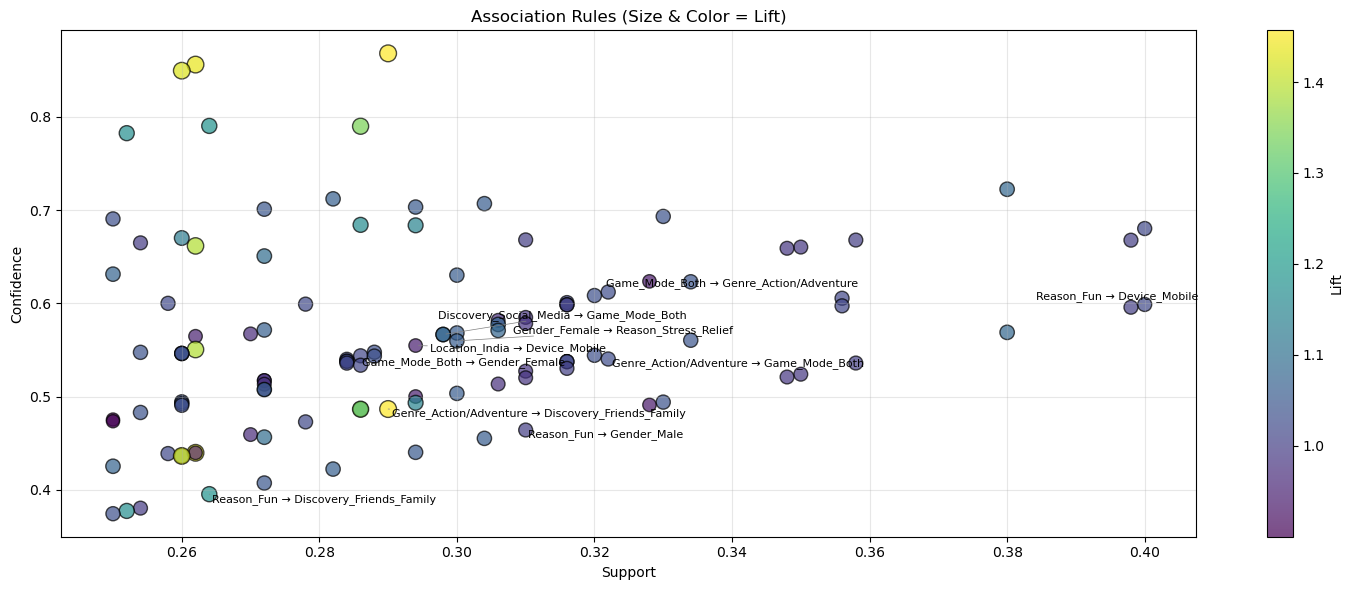

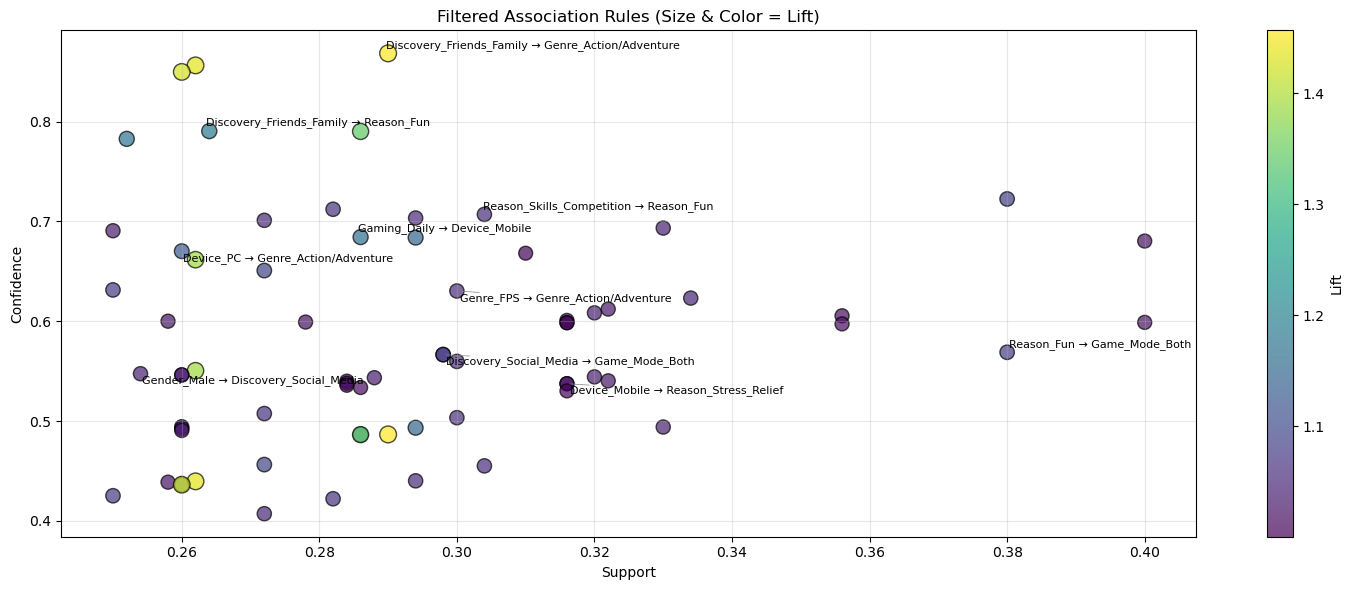

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

def visualize(
    rules,
    show_labels=False,
    max_labels=None,       # None = show all labels
    mode="first",          # "first", "random", "lift", "confidence", "support"
    title="Association Rules (Size & Color = Lift)",
    seed=None              # For reproducible "random" mode
):
    if len(rules) == 0:
        print("No association rules found with the given thresholds.")
        return

    plt.figure(figsize=(15, 6))

    scatter = plt.scatter(
        rules["support"],
        rules["confidence"],
        s=rules["lift"] * 100,
        c=rules["lift"],
        cmap="viridis",
        edgecolors="k",
        alpha=0.7
    )

    # Determine which points to label
    if show_labels:
        n_points = len(rules)
        if max_labels is None or max_labels > n_points:
            max_labels = n_points

        if mode == "first":
            rules_to_label = rules.head(max_labels)
        elif mode == "random":
            rng = np.random.default_rng(seed)
            rules_to_label = rules.sample(n=max_labels, random_state=rng)
        elif mode in ["lift", "confidence", "support"]:
            rules_to_label = rules.nlargest(max_labels, mode)
        else:
            raise ValueError("Invalid mode. Choose from 'first', 'random', 'lift', 'confidence', 'support'.")

        # Annotate selected points
        texts = []
        for _, row in rules_to_label.iterrows():
            antecedents = ", ".join(row["antecedents"])
            consequents = ", ".join(row["consequents"])
            texts.append(
                plt.text(
                    row["support"],
                    row["confidence"],
                    f"{antecedents} → {consequents}",
                    fontsize=8
                )
            )

        # Adjust to avoid overlapping
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.title(title)
    plt.colorbar(scatter, label="Lift")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


print(rules.shape)
print(filtered_rules.shape)
visualize(rules, show_labels=True, mode="random", max_labels=10, title="Association Rules (Size & Color = Lift)")
visualize(filtered_rules, show_labels=True, mode="random", max_labels=10, title="Filtered Association Rules (Size & Color = Lift)")

In [17]:
def rule_pair_key(row):
    a = tuple(sorted(row['antecedents']))
    c = tuple(sorted(row['consequents']))
    return tuple(sorted([a, c]))

filtered_rules['rule_key'] = filtered_rules.apply(rule_pair_key, axis=1)

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,rule_key
54,(Discovery_Friends_Family),(Genre_Action/Adventure),0.334,0.596,0.290,0.868263,1.456818,1.0,0.090936,3.066727,0.470829,0.453125,0.673919,0.677420,"((Discovery_Friends_Family,), (Genre_Action/Ad..."
88,(Genre_MMO),(Genre_Action/Adventure),0.306,0.596,0.262,0.856209,1.436593,1.0,0.079624,2.809636,0.437908,0.409375,0.644082,0.647903,"((Genre_Action/Adventure,), (Genre_MMO,))"
97,(Genre_RPG),(Genre_Action/Adventure),0.306,0.596,0.260,0.849673,1.425626,1.0,0.077624,2.687478,0.430193,0.404984,0.627904,0.642957,"((Genre_Action/Adventure,), (Genre_RPG,))"
84,(Discovery_Friends_Family),(Reason_Fun),0.334,0.668,0.264,0.790419,1.183262,1.0,0.040888,1.584114,0.232551,0.357724,0.368732,0.592814,"((Discovery_Friends_Family,), (Reason_Fun,))"
60,(Spend_lt100),(Device_Mobile),0.362,0.588,0.286,0.790055,1.343631,1.0,0.073144,1.962421,0.400859,0.430723,0.490425,0.638225,"((Device_Mobile,), (Spend_lt100,))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,(Genre_Action/Adventure),(Device_PC),0.596,0.388,0.260,0.436242,1.124334,1.0,0.028752,1.085571,0.273724,0.359116,0.078826,0.553172,"((Device_PC,), (Genre_Action/Adventure,))"
96,(Genre_Action/Adventure),(Genre_RPG),0.596,0.306,0.260,0.436242,1.425626,1.0,0.077624,1.231024,0.738995,0.404984,0.187668,0.642957,"((Genre_Action/Adventure,), (Genre_RPG,))"
112,(Device_Mobile),(Discovery_Gaming_Forums),0.588,0.396,0.250,0.425170,1.073662,1.0,0.017152,1.050746,0.166524,0.340599,0.048295,0.528242,"((Device_Mobile,), (Discovery_Gaming_Forums,))"
68,(Reason_Fun),(Discovery_Gaming_Forums),0.668,0.396,0.282,0.422156,1.066050,1.0,0.017472,1.045264,0.186619,0.360614,0.043304,0.567138,"((Discovery_Gaming_Forums,), (Reason_Fun,))"


In [18]:
rules_sorted = filtered_rules.sort_values(
    by='confidence',
    ascending=False
)
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,rule_key
54,(Discovery_Friends_Family),(Genre_Action/Adventure),0.334,0.596,0.290,0.868263,1.456818,1.0,0.090936,3.066727,0.470829,0.453125,0.673919,0.677420,"((Discovery_Friends_Family,), (Genre_Action/Ad..."
88,(Genre_MMO),(Genre_Action/Adventure),0.306,0.596,0.262,0.856209,1.436593,1.0,0.079624,2.809636,0.437908,0.409375,0.644082,0.647903,"((Genre_Action/Adventure,), (Genre_MMO,))"
97,(Genre_RPG),(Genre_Action/Adventure),0.306,0.596,0.260,0.849673,1.425626,1.0,0.077624,2.687478,0.430193,0.404984,0.627904,0.642957,"((Genre_Action/Adventure,), (Genre_RPG,))"
84,(Discovery_Friends_Family),(Reason_Fun),0.334,0.668,0.264,0.790419,1.183262,1.0,0.040888,1.584114,0.232551,0.357724,0.368732,0.592814,"((Discovery_Friends_Family,), (Reason_Fun,))"
60,(Spend_lt100),(Device_Mobile),0.362,0.588,0.286,0.790055,1.343631,1.0,0.073144,1.962421,0.400859,0.430723,0.490425,0.638225,"((Device_Mobile,), (Spend_lt100,))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,(Genre_Action/Adventure),(Device_PC),0.596,0.388,0.260,0.436242,1.124334,1.0,0.028752,1.085571,0.273724,0.359116,0.078826,0.553172,"((Device_PC,), (Genre_Action/Adventure,))"
96,(Genre_Action/Adventure),(Genre_RPG),0.596,0.306,0.260,0.436242,1.425626,1.0,0.077624,1.231024,0.738995,0.404984,0.187668,0.642957,"((Genre_Action/Adventure,), (Genre_RPG,))"
112,(Device_Mobile),(Discovery_Gaming_Forums),0.588,0.396,0.250,0.425170,1.073662,1.0,0.017152,1.050746,0.166524,0.340599,0.048295,0.528242,"((Device_Mobile,), (Discovery_Gaming_Forums,))"
68,(Reason_Fun),(Discovery_Gaming_Forums),0.668,0.396,0.282,0.422156,1.066050,1.0,0.017472,1.045264,0.186619,0.360614,0.043304,0.567138,"((Discovery_Gaming_Forums,), (Reason_Fun,))"


In [19]:
final_rules = rules_sorted.drop_duplicates(
    subset='rule_key'
).drop(columns='rule_key')
print(final_rules.shape)
final_rules

(42, 14)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
54,(Discovery_Friends_Family),(Genre_Action/Adventure),0.334,0.596,0.290,0.868263,1.456818,1.0,0.090936,3.066727,0.470829,0.453125,0.673919,0.677420
88,(Genre_MMO),(Genre_Action/Adventure),0.306,0.596,0.262,0.856209,1.436593,1.0,0.079624,2.809636,0.437908,0.409375,0.644082,0.647903
97,(Genre_RPG),(Genre_Action/Adventure),0.306,0.596,0.260,0.849673,1.425626,1.0,0.077624,2.687478,0.430193,0.404984,0.627904,0.642957
84,(Discovery_Friends_Family),(Reason_Fun),0.334,0.668,0.264,0.790419,1.183262,1.0,0.040888,1.584114,0.232551,0.357724,0.368732,0.592814
60,(Spend_lt100),(Device_Mobile),0.362,0.588,0.286,0.790055,1.343631,1.0,0.073144,1.962421,0.400859,0.430723,0.490425,0.638225
109,(Gaming_Hours_5-10_hours),(Reason_Fun),0.322,0.668,0.252,0.782609,1.171570,1.0,0.036904,1.527200,0.215995,0.341463,0.345207,0.579927
5,(Game_Mode_Both),(Reason_Fun),0.526,0.668,0.380,0.722433,1.081487,1.0,0.028632,1.196110,0.158961,0.466830,0.163956,0.645648
69,(Discovery_Gaming_Forums),(Reason_Fun),0.396,0.668,0.282,0.712121,1.066050,1.0,0.017472,1.153263,0.102579,0.360614,0.132895,0.567138
41,(Reason_Skills_Competition),(Reason_Fun),0.430,0.668,0.304,0.706977,1.058348,1.0,0.016760,1.133016,0.096722,0.382872,0.117400,0.581033
51,(Gaming_Daily),(Reason_Fun),0.418,0.668,0.294,0.703349,1.052918,1.0,0.014776,1.119161,0.086355,0.371212,0.106474,0.571735


In [20]:
category_distribution(final_rules, item_groups)

,Antecedent Item Count,Consequent Item Count,Rules w/ Antecedent (%),Rules w/ Consequent (%)
Category,,,,
Gender,7,0,16.666667,0.000000
Age,0,0,0.000000,0.000000
Location,3,0,7.142857,0.000000
Frequency,3,0,7.142857,0.000000
Hours,1,0,2.380952,0.000000
Device,4,8,9.523810,19.047619
Genre,6,14,14.285714,33.333333
Favorite,0,0,0.000000,0.000000
Discovery,7,1,16.666667,2.380952


In [21]:
final_rules.describe()

,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.458381,0.589952,0.291000,0.647385,1.097680,1.0,0.022182,1.263443,0.133826,0.384345,0.143474,0.571846
std,0.078864,0.058891,0.034182,0.095572,0.125285,0.0,0.023598,0.487723,0.129208,0.034807,0.179396,0.040065
min,0.306000,0.476000,0.250000,0.490566,1.000155,1.0,0.000048,1.000312,0.000289,0.320513,0.000312,0.515152
25%,0.396000,0.528000,0.262000,0.574526,1.023719,1.0,0.007342,1.033496,0.047771,0.359130,0.032404,0.539037
50%,0.470000,0.596000,0.286000,0.630783,1.047487,1.0,0.013680,1.072536,0.081672,0.380000,0.067630,0.566971
75%,0.527500,0.650000,0.308500,0.699093,1.089228,1.0,0.027192,1.186247,0.156962,0.402892,0.156827,0.590953
max,0.588000,0.668000,0.400000,0.868263,1.456818,1.0,0.090936,3.066727,0.470829,0.467290,0.673919,0.677420


### Lift

In [22]:
n = 10

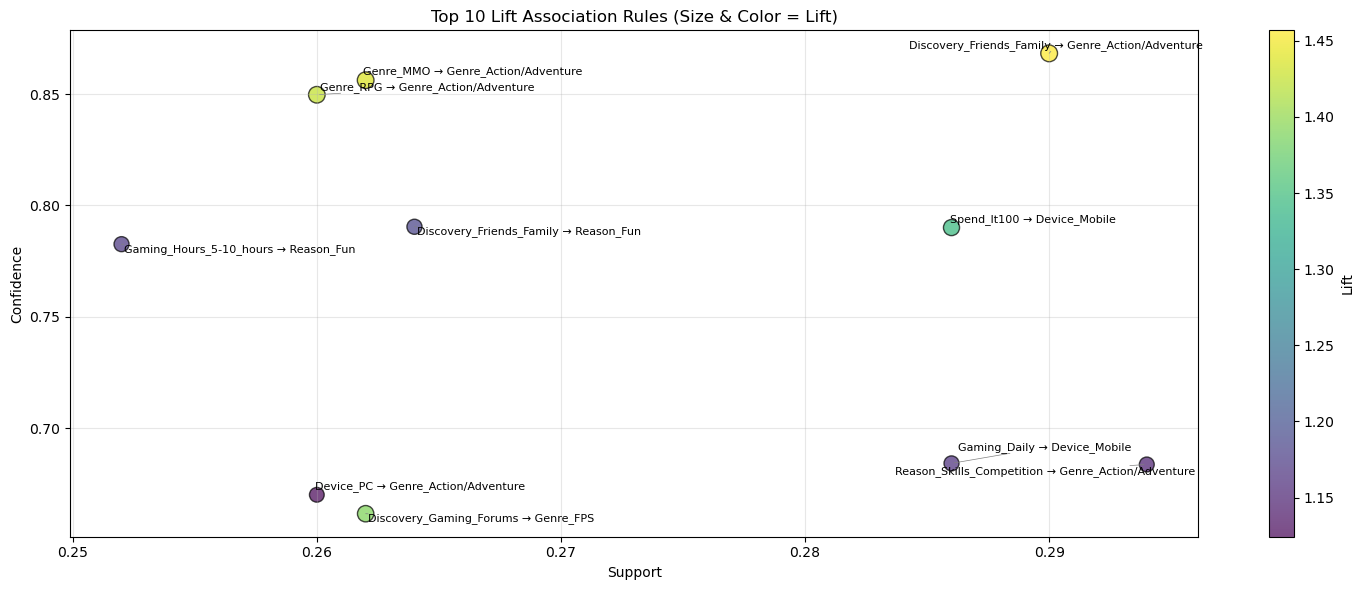

,antecedents,consequents,support,confidence,lift
54,(Discovery_Friends_Family),(Genre_Action/Adventure),0.290,0.868263,1.456818
88,(Genre_MMO),(Genre_Action/Adventure),0.262,0.856209,1.436593
97,(Genre_RPG),(Genre_Action/Adventure),0.260,0.849673,1.425626
87,(Discovery_Gaming_Forums),(Genre_FPS),0.262,0.661616,1.389950
60,(Spend_lt100),(Device_Mobile),0.286,0.790055,1.343631
84,(Discovery_Friends_Family),(Reason_Fun),0.264,0.790419,1.183262
109,(Gaming_Hours_5-10_hours),(Reason_Fun),0.252,0.782609,1.171570
63,(Gaming_Daily),(Device_Mobile),0.286,0.684211,1.163623
52,(Reason_Skills_Competition),(Genre_Action/Adventure),0.294,0.683721,1.147183
92,(Device_PC),(Genre_Action/Adventure),0.260,0.670103,1.124334


In [23]:
top_lift_rules = final_rules.nlargest(n, "lift")
visualize(top_lift_rules, show_labels=True, mode="lift", title=f"Top {n} Lift Association Rules (Size & Color = Lift)")
top_lift_rules[["antecedents", "consequents", "support", "confidence", "lift"]]

#### Confidence

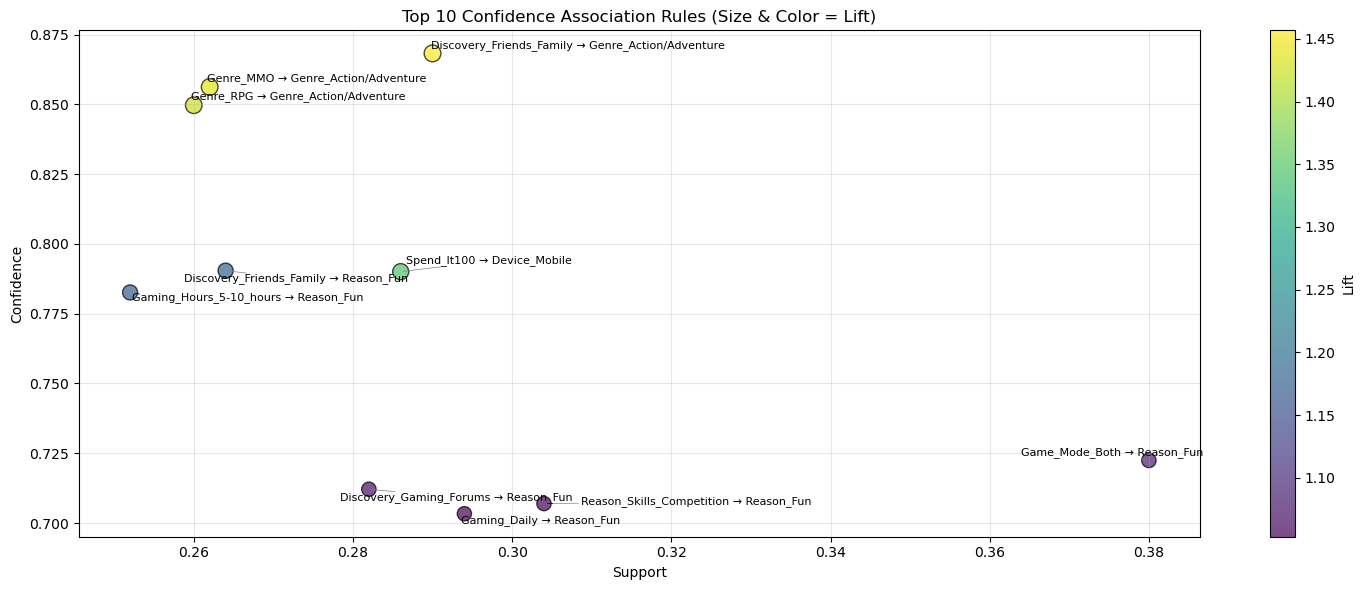

,antecedents,consequents,support,confidence,lift
54,(Discovery_Friends_Family),(Genre_Action/Adventure),0.290,0.868263,1.456818
88,(Genre_MMO),(Genre_Action/Adventure),0.262,0.856209,1.436593
97,(Genre_RPG),(Genre_Action/Adventure),0.260,0.849673,1.425626
84,(Discovery_Friends_Family),(Reason_Fun),0.264,0.790419,1.183262
60,(Spend_lt100),(Device_Mobile),0.286,0.790055,1.343631
109,(Gaming_Hours_5-10_hours),(Reason_Fun),0.252,0.782609,1.171570
5,(Game_Mode_Both),(Reason_Fun),0.380,0.722433,1.081487
69,(Discovery_Gaming_Forums),(Reason_Fun),0.282,0.712121,1.066050
41,(Reason_Skills_Competition),(Reason_Fun),0.304,0.706977,1.058348
51,(Gaming_Daily),(Reason_Fun),0.294,0.703349,1.052918


In [24]:
top_confidence_rules = final_rules.nlargest(n, "confidence")
visualize(top_confidence_rules, show_labels=True, mode="confidence", title=f"Top {n} Confidence Association Rules (Size & Color = Lift)")
top_confidence_rules[["antecedents", "consequents", "support", "confidence", "lift"]]

#### Support

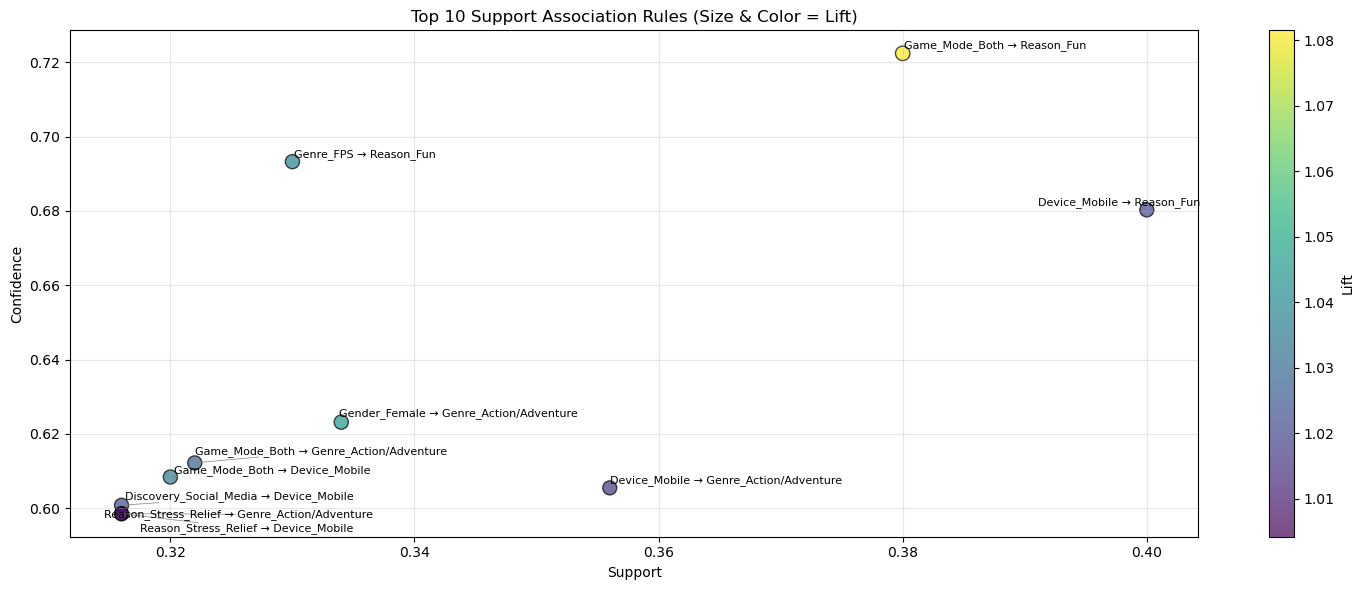

,antecedents,consequents,support,confidence,lift
1,(Device_Mobile),(Reason_Fun),0.400,0.680272,1.018371
5,(Game_Mode_Both),(Reason_Fun),0.380,0.722433,1.081487
8,(Device_Mobile),(Genre_Action/Adventure),0.356,0.605442,1.015843
14,(Gender_Female),(Genre_Action/Adventure),0.334,0.623134,1.045527
16,(Genre_FPS),(Reason_Fun),0.330,0.693277,1.037840
20,(Game_Mode_Both),(Genre_Action/Adventure),0.322,0.612167,1.027126
22,(Game_Mode_Both),(Device_Mobile),0.320,0.608365,1.034634
29,(Discovery_Social_Media),(Device_Mobile),0.316,0.600760,1.021701
27,(Reason_Stress_Relief),(Device_Mobile),0.316,0.598485,1.017831
24,(Reason_Stress_Relief),(Genre_Action/Adventure),0.316,0.598485,1.004169


In [25]:
top_support_rules = final_rules.nlargest(10, "support")
visualize(top_support_rules, show_labels=True, mode="support", title=f"Top {n} Support Association Rules (Size & Color = Lift)")
top_support_rules[["antecedents", "consequents", "support", "confidence", "lift"]]

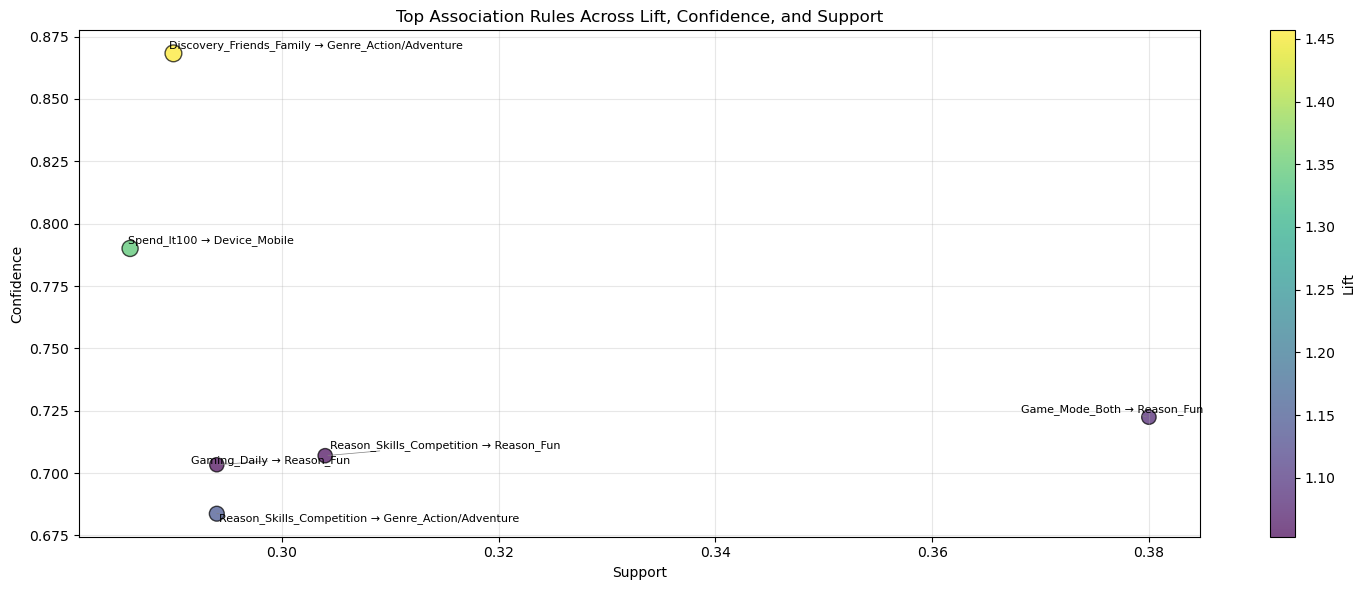

Discovery_Friends_Family -> Genre_Action/Adventure
Spend_lt100 -> Device_Mobile
Reason_Skills_Competition -> Genre_Action/Adventure
Game_Mode_Both -> Reason_Fun
Reason_Skills_Competition -> Reason_Fun
Gaming_Daily -> Reason_Fun


,antecedents,consequents,support,confidence,lift
0,(Discovery_Friends_Family),(Genre_Action/Adventure),0.290,0.868263,1.456818
1,(Spend_lt100),(Device_Mobile),0.286,0.790055,1.343631
2,(Reason_Skills_Competition),(Genre_Action/Adventure),0.294,0.683721,1.147183
3,(Game_Mode_Both),(Reason_Fun),0.380,0.722433,1.081487
4,(Reason_Skills_Competition),(Reason_Fun),0.304,0.706977,1.058348
5,(Gaming_Daily),(Reason_Fun),0.294,0.703349,1.052918


In [26]:
n = 20

top_lift_rules = final_rules.nlargest(n, "lift")
top_confidence_rules = final_rules.nlargest(n, "confidence")
top_support_rules = final_rules.nlargest(n, "support")

rule_keys = ["antecedents", "consequents"]

intersection_keys = (
    top_lift_rules[rule_keys]
    .merge(top_confidence_rules[rule_keys], on=rule_keys, how="inner")
    .merge(top_support_rules[rule_keys], on=rule_keys, how="inner")
)

top_metrics_intersected = intersection_keys.merge(
    final_rules,
    on=rule_keys,
    how="left"
)

visualize(top_metrics_intersected, show_labels=True, title="Top Association Rules Across Lift, Confidence, and Support")

print_apriori_rules(top_metrics_intersected)
top_metrics_intersected[["antecedents", "consequents", "support", "confidence", "lift"]]

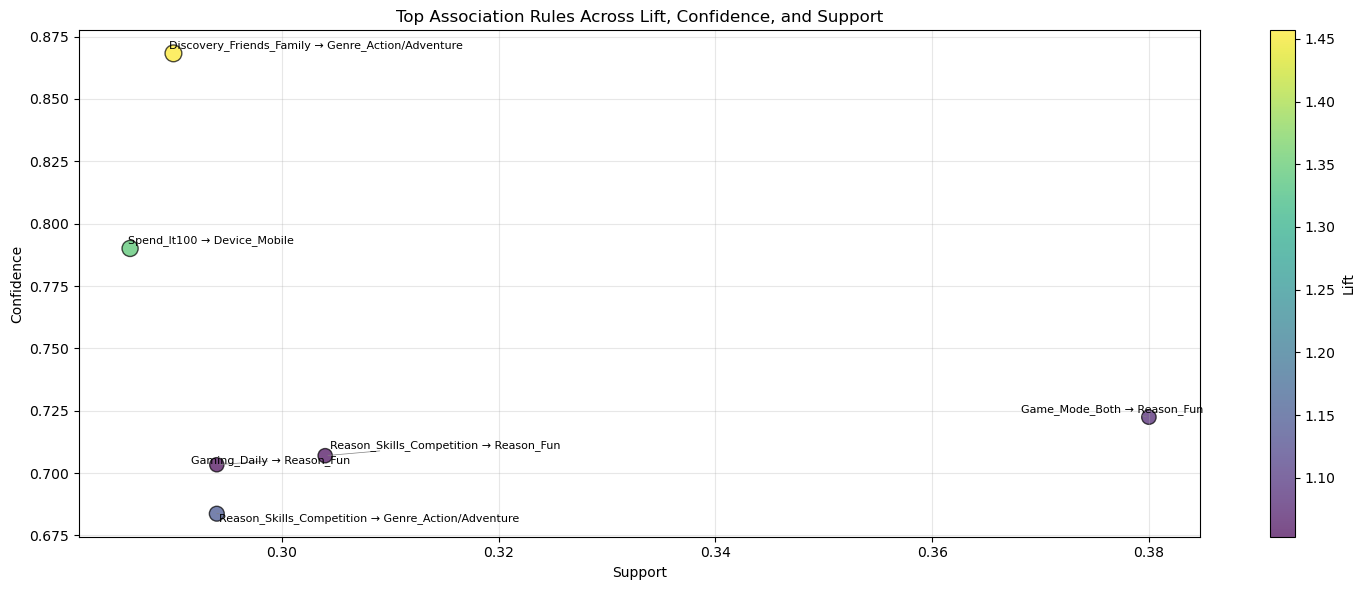

,antecedents,consequents,lift,confidence,support
0,(Discovery_Friends_Family),(Genre_Action/Adventure),1.456818,0.868263,0.290
1,(Spend_lt100),(Device_Mobile),1.343631,0.790055,0.286
2,(Reason_Skills_Competition),(Genre_Action/Adventure),1.147183,0.683721,0.294
3,(Game_Mode_Both),(Reason_Fun),1.081487,0.722433,0.380
4,(Reason_Skills_Competition),(Reason_Fun),1.058348,0.706977,0.304
5,(Gaming_Daily),(Reason_Fun),1.052918,0.703349,0.294


In [27]:
visualize(top_metrics_intersected, show_labels=True, title="Top Association Rules Across Lift, Confidence, and Support")
top_metrics_intersected[["antecedents", "consequents", "lift", "confidence", "support"]]

# Results Analysis

In [28]:
n = 10

top_lift_rules = final_rules.nlargest(n, "lift")
top_confidence_rules = final_rules.nlargest(n, "confidence")
top_support_rules = final_rules.nlargest(n, "support")

In [29]:
print_apriori_rules(top_lift_rules)

Discovery_Friends_Family -> Genre_Action/Adventure
Genre_MMO -> Genre_Action/Adventure
Genre_RPG -> Genre_Action/Adventure
Discovery_Gaming_Forums -> Genre_FPS
Spend_lt100 -> Device_Mobile
Discovery_Friends_Family -> Reason_Fun
Gaming_Hours_5-10_hours -> Reason_Fun
Gaming_Daily -> Device_Mobile
Reason_Skills_Competition -> Genre_Action/Adventure
Device_PC -> Genre_Action/Adventure


In [30]:
print_apriori_rules(top_confidence_rules)

Discovery_Friends_Family -> Genre_Action/Adventure
Genre_MMO -> Genre_Action/Adventure
Genre_RPG -> Genre_Action/Adventure
Discovery_Friends_Family -> Reason_Fun
Spend_lt100 -> Device_Mobile
Gaming_Hours_5-10_hours -> Reason_Fun
Game_Mode_Both -> Reason_Fun
Discovery_Gaming_Forums -> Reason_Fun
Reason_Skills_Competition -> Reason_Fun
Gaming_Daily -> Reason_Fun


In [31]:
print_apriori_rules(top_support_rules)

Device_Mobile -> Reason_Fun
Game_Mode_Both -> Reason_Fun
Device_Mobile -> Genre_Action/Adventure
Gender_Female -> Genre_Action/Adventure
Genre_FPS -> Reason_Fun
Game_Mode_Both -> Genre_Action/Adventure
Game_Mode_Both -> Device_Mobile
Discovery_Social_Media -> Device_Mobile
Reason_Stress_Relief -> Device_Mobile
Reason_Stress_Relief -> Genre_Action/Adventure


In [32]:
male_rules = final_rules[
    final_rules["antecedents"] == frozenset({"Gender_Male"})
].sort_values(by="lift", ascending=False)
female_rules = final_rules[
    final_rules["antecedents"] == frozenset({"Gender_Female"})
].sort_values(by="lift", ascending=False)
print_apriori_rules(male_rules)
print_apriori_rules(female_rules)
gender_rules = male_rules.merge(female_rules, how="outer")
gender_rules[["antecedents", "consequents", "support", "confidence", "lift"]]

Gender_Male -> Discovery_Social_Media
Gender_Male -> Device_Mobile
Gender_Male -> Reason_Fun
Gender_Female -> Genre_FPS
Gender_Female -> Reason_Stress_Relief
Gender_Female -> Genre_Action/Adventure
Gender_Female -> Game_Mode_Both


,antecedents,consequents,support,confidence,lift
0,(Gender_Male),(Discovery_Social_Media),0.254,0.547414,1.040711
1,(Gender_Male),(Device_Mobile),0.278,0.599138,1.018942
2,(Gender_Male),(Reason_Fun),0.310,0.668103,1.000155
3,(Gender_Female),(Genre_FPS),0.272,0.507463,1.066098
4,(Gender_Female),(Reason_Stress_Relief),0.300,0.559701,1.060041
5,(Gender_Female),(Genre_Action/Adventure),0.334,0.623134,1.045527
6,(Gender_Female),(Game_Mode_Both),0.286,0.533582,1.014415


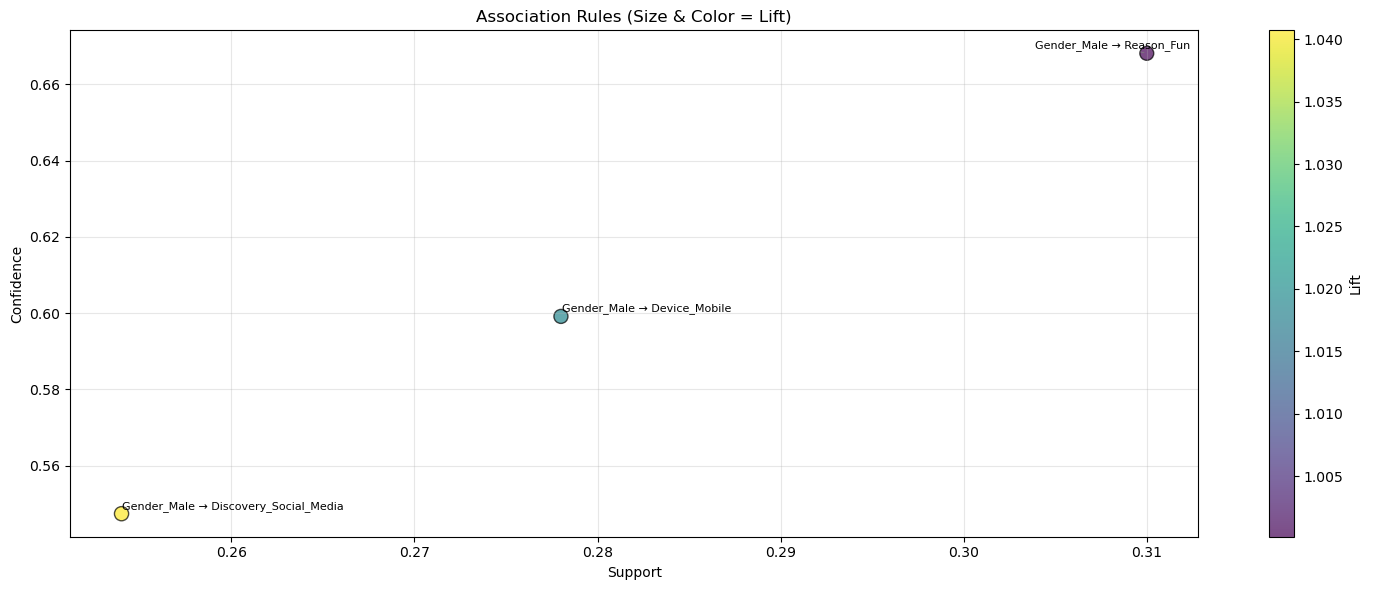

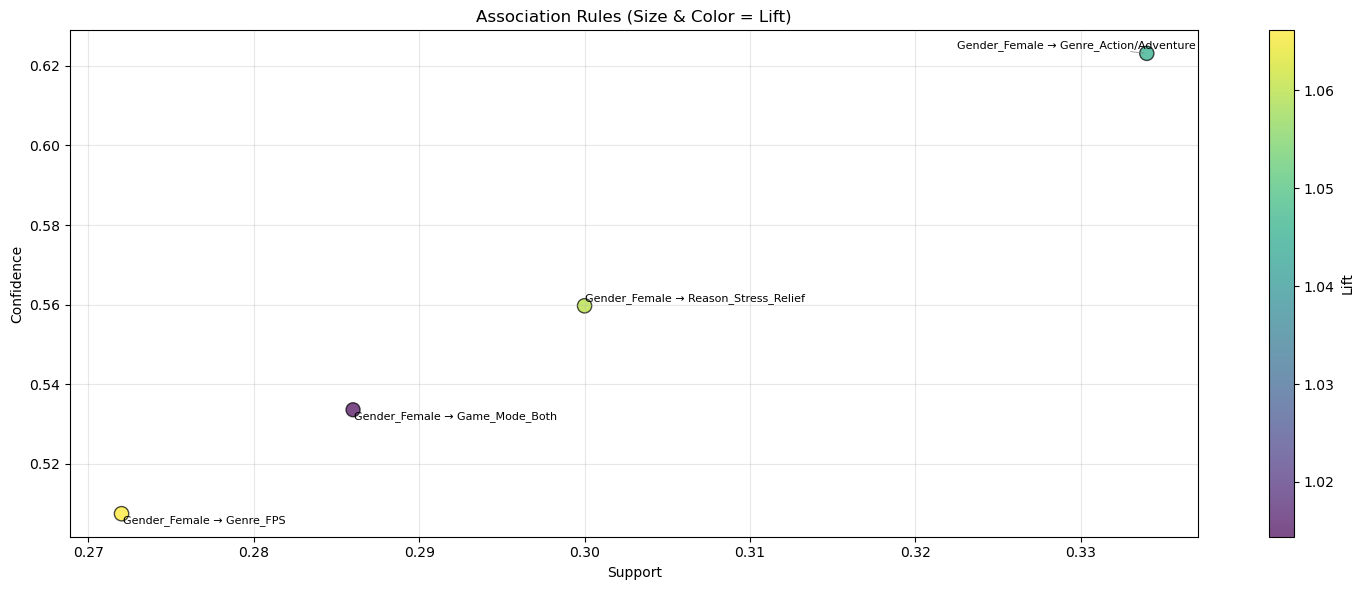

In [33]:
visualize(male_rules, show_labels=True)
visualize(female_rules, show_labels=True)

In [34]:
male_rules = final_rules[
    final_rules["antecedents"] == frozenset({"Gender_Male"})
].sort_values(by="lift", ascending=False)
female_rules = final_rules[
    final_rules["antecedents"] == frozenset({"Gender_Female"})
].sort_values(by="lift", ascending=False)
print_apriori_rules(male_rules)
print_apriori_rules(female_rules)

Gender_Male -> Discovery_Social_Media
Gender_Male -> Device_Mobile
Gender_Male -> Reason_Fun
Gender_Female -> Genre_FPS
Gender_Female -> Reason_Stress_Relief
Gender_Female -> Genre_Action/Adventure
Gender_Female -> Game_Mode_Both


(6, 14)
Genre_MMO -> Genre_Action/Adventure
Genre_RPG -> Genre_Action/Adventure
Genre_FPS -> Reason_Fun
Genre_FPS -> Genre_Action/Adventure
Genre_FPS -> Game_Mode_Both
Genre_FPS -> Reason_Stress_Relief


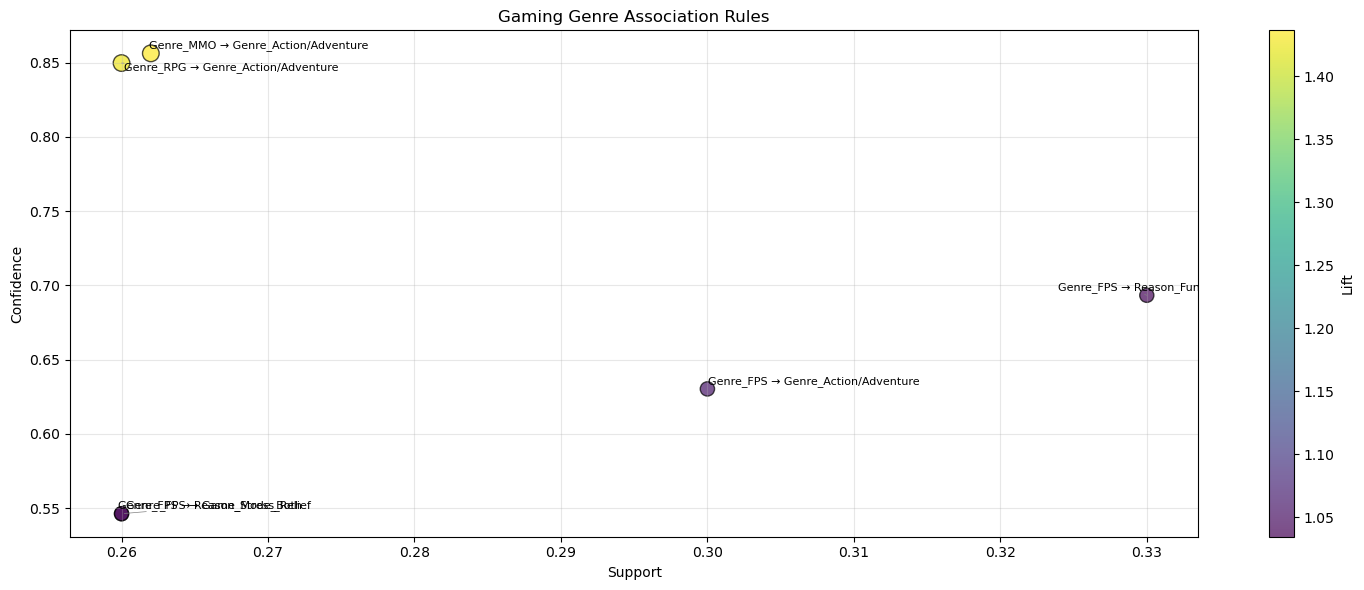

In [35]:
genre_items = set(item_groups["Genre"])

genre_rules = final_rules[
    final_rules["antecedents"].apply(lambda x: not x.isdisjoint(genre_items))
]

print(genre_rules.shape)
print_apriori_rules(genre_rules)
visualize(genre_rules, title="Gaming Genre Association Rules", mode="random", show_labels=True)

(5, 14)
Reason_Skills_Competition -> Reason_Fun
Reason_Skills_Competition -> Genre_Action/Adventure
Reason_Skills_Competition -> Device_Mobile
Reason_Stress_Relief -> Device_Mobile
Reason_Stress_Relief -> Genre_Action/Adventure


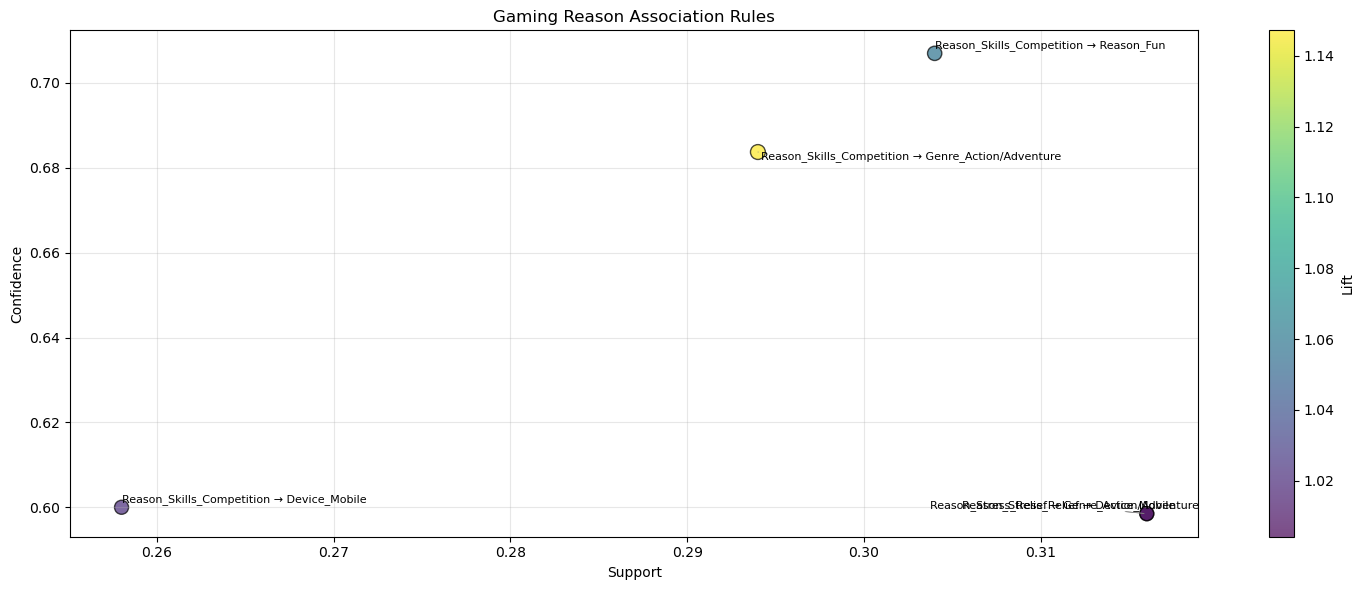

In [36]:
reason_items = set(item_groups["Reason"])

reason_rules = final_rules[
    final_rules["antecedents"].apply(lambda x: not x.isdisjoint(reason_items))
]

print(reason_rules.shape)
print_apriori_rules(reason_rules)
visualize(reason_rules, title="Gaming Reason Association Rules", mode="random", show_labels=True)

(11, 15)
Device_PC -> Reason_Fun
Device_Mobile -> Reason_Fun
Device_PC -> Genre_Action/Adventure
Device_Mobile -> Genre_Action/Adventure
Device_Mobile -> Game_Mode_Both
Device_Mobile -> Discovery_Social_Media
Device_Mobile -> Reason_Stress_Relief
Device_Mobile -> Gaming_Daily
Device_Mobile -> Spend_lt100
Device_Mobile -> Reason_Skills_Competition
Device_Mobile -> Discovery_Gaming_Forums


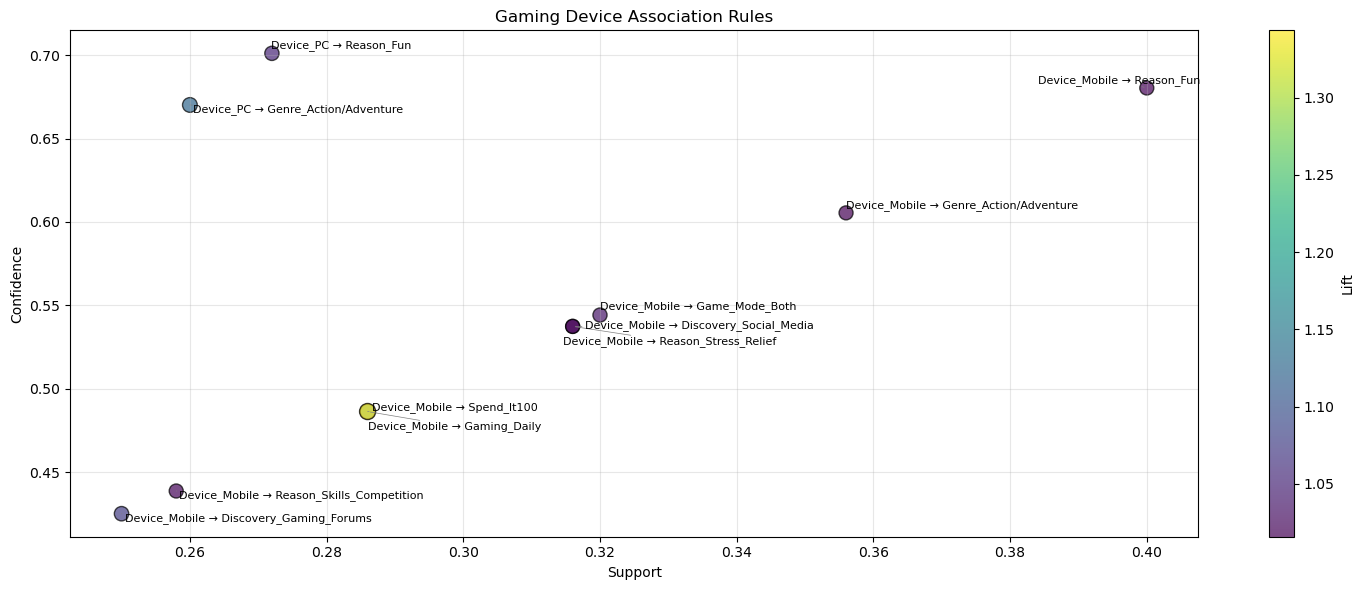

In [37]:
device_items = set(item_groups["Device"])

device_rules = filtered_rules[
    filtered_rules["antecedents"].apply(lambda x: not x.isdisjoint(device_items))
]

print(device_rules.shape)
print_apriori_rules(device_rules)
visualize(device_rules, title="Gaming Device Association Rules", mode="random", show_labels=True)

In [38]:
gender_items = set(item_groups["Gender"])
favorite_items = set(item_groups["Favorite"])

gender_favorite_rules = final_rules[
    final_rules["antecedents"].apply(lambda x: not x.isdisjoint(gender_items)) &
    final_rules["consequents"].apply(lambda x: not x.isdisjoint(favorite_items))
]

print(gender_favorite_rules.shape)

visualize(gender_favorite_rules, title="Gender to Favorite Game Association Rules", mode="random", show_labels=True, max_labels=7)

(0, 14)
No association rules found with the given thresholds.


(2, 14)


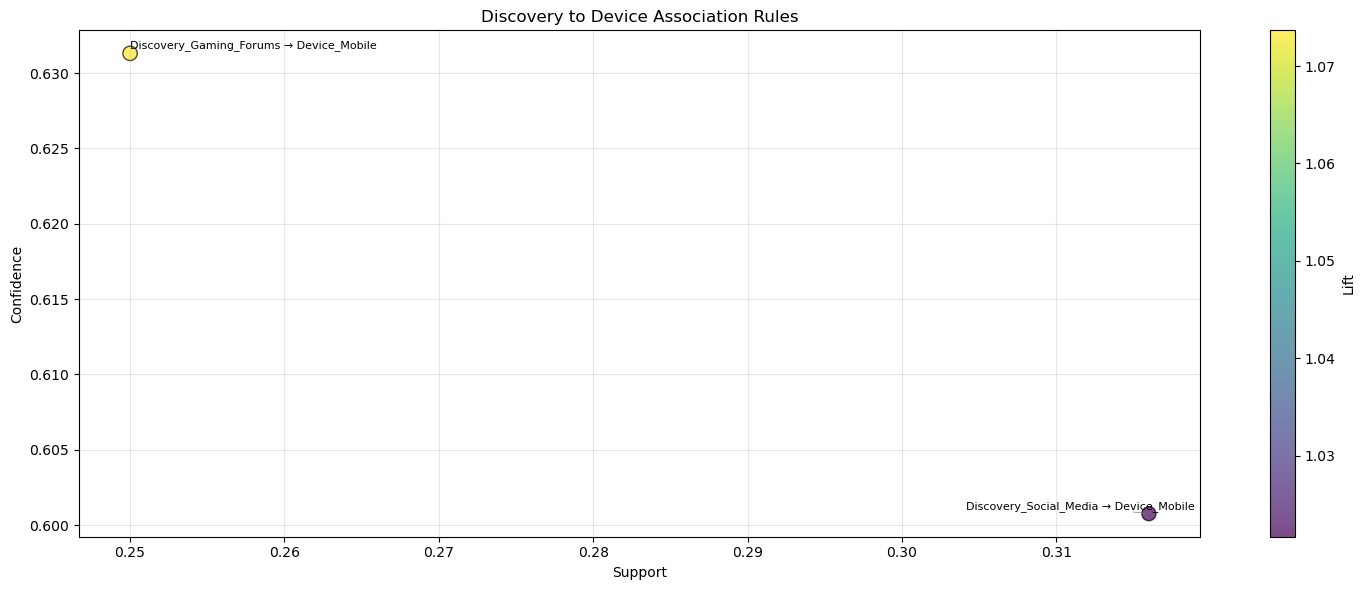

In [39]:
discovery_items = set(item_groups["Discovery"])
device_items = set(item_groups["Device"])

discovery_device_rules = final_rules[
    final_rules["antecedents"].apply(lambda x: not x.isdisjoint(discovery_items)) &
    final_rules["consequents"].apply(lambda x: not x.isdisjoint(device_items))
]

print(discovery_device_rules.shape)

visualize(discovery_device_rules, title="Discovery to Device Association Rules", mode="support", show_labels=True)

In [40]:
age_items = set(item_groups["Age"])

age_rules = final_rules[
    final_rules["antecedents"].apply(lambda x: not x.isdisjoint(age_items))
]

print(age_rules.shape)
visualize(age_rules, title="Age Association Rules", mode="support", show_labels=True)

(0, 14)
No association rules found with the given thresholds.


(1, 14)


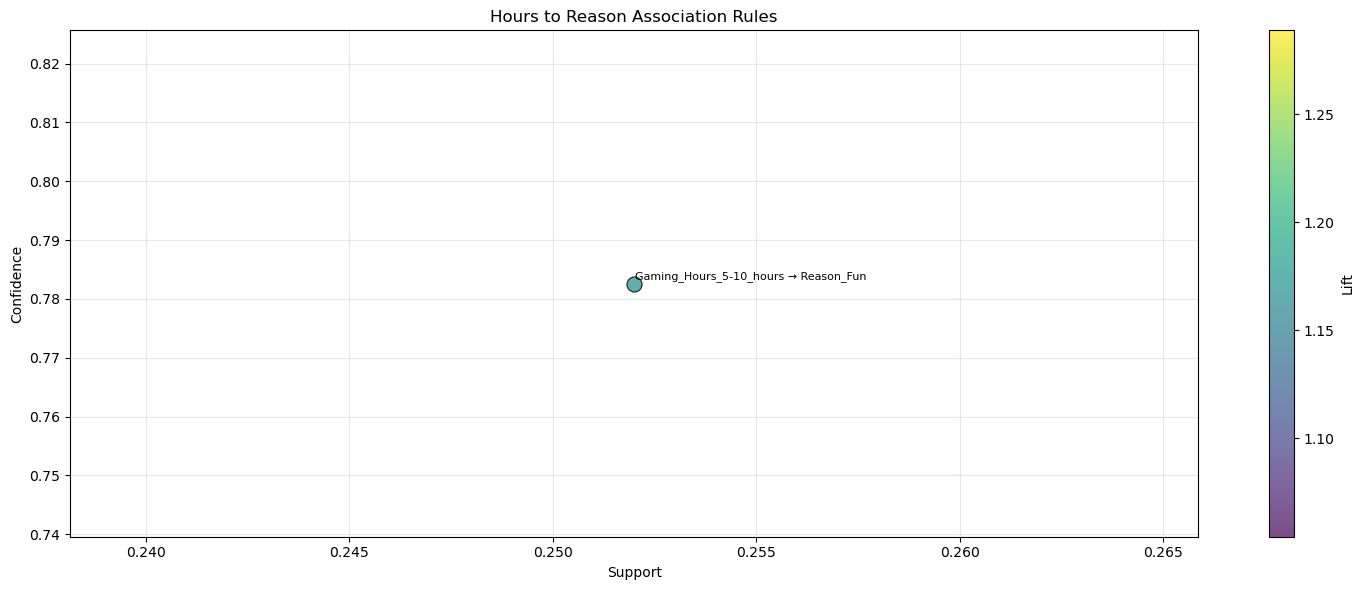

In [41]:
hours_items = set(item_groups["Hours"])
reason_items = set(item_groups["Reason"])

hours_reason_rules = final_rules[
    final_rules["antecedents"].apply(lambda x: not x.isdisjoint(hours_items)) &
    final_rules["consequents"].apply(lambda x: not x.isdisjoint(reason_items))
]

print(hours_reason_rules.shape)

visualize(hours_reason_rules, title="Hours to Reason Association Rules", mode="support", show_labels=True, max_labels=7)